In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [5]:
# Loading the data
iris=load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [6]:
# EDA
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
# creating features and labels
x=iris.data
y=iris.target

In [8]:
# printing the shape
print('x matrix dimensionality :',x.shape)
print('y matrix dimensionality :',y.shape)


x matrix dimensionality : (150, 4)
y matrix dimensionality : (150,)


In [9]:
# splitting the data into training data and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [17]:
# searching for optimal value of k

# list of scores from k_range
k_range=range(1,25)

# list of scores
k_scores=[]

# looping through values of k
for k in k_range:
    clf=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(clf,x,y,cv=10,scoring='accuracy')    # generally 5-10 for industry
    k_scores.append(scores.mean())
    
print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96]


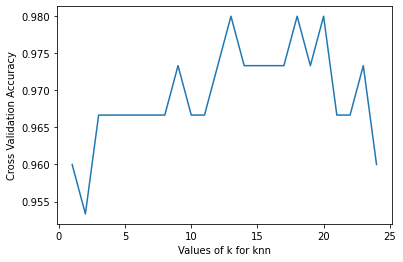

In [18]:
# finding the optimal value of k
plt.plot(k_range,k_scores)
plt.xlabel('Values of k for knn')
plt.ylabel('Cross Validation Accuracy')
plt.show()

# we only take those k value which are odd
# as k increases computational cost is also increasing so if k have multiple similar value then take optimal value
# here out of 13,17,19 we took 13

In [19]:
# creating an optimal model
knn_opt=KNeighborsClassifier(n_neighbors=13)

# fitting the optimal model
knn_opt.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [20]:
# predictions
y_pred=knn_opt.predict(x_test)

In [21]:
# confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[41,  0,  0],
       [ 0, 31,  7],
       [ 0,  4, 37]], dtype=int64)